### NIM         : 2201741971 / 2401822232
### Name        : Edward
### Class       : LTY2
### Course      : Selected Topics in Computational Intelligence II
### Course Code : COMP8039041
### Source : https://github.com/Amirhossein-Rajabpour/Fuzzy-C-Means-Clustering/blob/main/CI_Project2.ipynb

### Importing the required libraries

In [1]:
### Importing the required Libraries
import pandas as pd
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt
import sys

### Read the Dataset

In [2]:
### reading the input csv file 
qcm3 = pd.read_csv('QCM3.csv', sep = ';')
qcm6 = pd.read_csv('QCM6.csv', sep = ';')
qcm7 = pd.read_csv('QCM7.csv', sep = ';')
qcm10 = pd.read_csv('QCM10.csv', sep = ';')
qcm12 = pd.read_csv('QCM12.csv', sep = ';')

In [3]:
print("Shape of qcm3: ", qcm3.shape)
print("Shape of qcm6: ", qcm6.shape)
print("Shape of qcm7: ", qcm7.shape)
print("Shape of qcm10: ", qcm10.shape)
print("Shape of qcm12: ", qcm12.shape)

Shape of qcm3:  (25, 15)
Shape of qcm6:  (25, 15)
Shape of qcm7:  (25, 15)
Shape of qcm10:  (25, 15)
Shape of qcm12:  (25, 15)


### Combine Dataset

In [4]:
dataset = pd.concat([qcm3, qcm6, qcm7, qcm10, qcm12])
print("Shape of dataset: ", dataset.shape)

Shape of dataset:  (125, 15)


In [5]:
dataset.head()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,1-Octanol,1-Propanol,2-Butanol,2-propanol,1-isobutanol
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,1,0,0,0,0
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,1,0,0,0,0
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,1,0,0,0,0
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,1,0,0,0,0
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,1,0,0,0,0


### Drop Unused Column

In [6]:
dataset.drop('1-Octanol', axis = 1, inplace = True)
dataset.drop('1-Propanol', axis = 1, inplace = True)
dataset.drop('2-Butanol', axis = 1, inplace = True)
dataset.drop('2-propanol', axis = 1, inplace = True)
dataset.drop('1-isobutanol', axis = 1, inplace = True)

In [7]:
dataset.head()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65


### Change Header into Index

In [8]:
dataset.columns = range(dataset.shape[1])

In [9]:
dataset

,0,1,2,3,4,5,6,7,8,9
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65
...,...,...,...,...,...,...,...,...,...,...
20,-54.35,-56.09,-88.23,-90.54,-128.65,-132.19,-173.71,-179.36,-231.30,-239.19
21,-56.14,-57.35,-90.74,-92.60,-132.16,-135.36,-178.79,-183.93,-239.06,-246.53
22,-57.71,-58.37,-92.83,-93.91,-134.83,-137.56,-182.33,-187.16,-243.12,-250.30
23,-58.36,-58.92,-94.31,-95.13,-136.44,-138.96,-184.70,-189.32,-246.15,-252.80


### Save Final Dataset into CSV

In [10]:
dataset.to_csv('final_QCM.csv',header=None,index=False)

In [11]:
pathQCM = 'final_QCM.csv'
dataQCM = np.genfromtxt(pathQCM, delimiter=',')

In [12]:
dataQCM

array([[ -10.06,  -10.62,  -14.43, ...,  -45.59,  -54.89,  -62.28],
       [  -9.69,  -10.86,  -16.73, ...,  -52.43,  -61.92,  -71.27],
       [ -12.07,  -14.28,  -21.54, ...,  -62.49,  -71.97,  -83.1 ],
       ...,
       [ -57.71,  -58.37,  -92.83, ..., -187.16, -243.12, -250.3 ],
       [ -58.36,  -58.92,  -94.31, ..., -189.32, -246.15, -252.8 ],
       [ -59.  ,  -59.26,  -94.97, ..., -191.19, -248.98, -255.23]])

### Fuzzy C-Means structure

#### Finding minimum and maximum in the given dataset

In [13]:
def find_max(dataset):
  cols = dataset.shape[1]
  max_in_dataset = -sys.maxsize
  for col in range(cols):
    if max(dataset[:, col]) > max_in_dataset:
      max_in_dataset = max(dataset[:, col])
  return max_in_dataset

In [14]:
def find_min(dataset):
  cols = dataset.shape[1]
  min_in_dataset = sys.maxsize
  for col in range(cols):
    if min(dataset[:, col]) < min_in_dataset:
      min_in_dataset = min(dataset[:, col])
  return min_in_dataset

### Randomely choose a value for each dimmension (feature)

In [15]:
def initialize_centroids(dataset, k, minimum, maximum):
  cols = dataset.shape[1]
  centroids = np.array([np.array([random.uniform(minimum, maximum) for col in range(cols)]) for i in range(k)])
  return centroids

### Calculate fuzziness for each point

# <br>
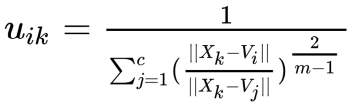

In [16]:
def update_data_fuzziness(dataset, centroids, m):
  u = np.array([[1 / np.sum([(np.linalg.norm(data - vi) / np.linalg.norm(data - vj)) ** (2 / (m - 1)) for vj in centroids]) for vi in centroids]for data in dataset], dtype='float64')  
  return u

### Modifying means

# <br>

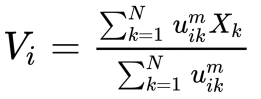

In [17]:
def modify_centroids(num_centroids, u, dataset, m):
  N = len(dataset)
  centroids = np.array([np.add.reduce([(u[k, i] ** m) * dataset[k] for k in range(N)]) / np.sum([u_[i] ** m for u_ in u]) for i in range(num_centroids)])
  return centroids

### Calculating errors

In [18]:
def error_calculator(u, m, dataset, centroids):
  error = np.sum([np.sum([(u[j, i] ** m) * (np.linalg.norm(dataset[j] - centroids[i]) ** 2) 
            for i in range(len(centroids))]) 
      for j in range(len(dataset))])
  return error

### Creating the model

In [19]:
def fuzzy_cmeans_model(dataset, k, num_iterations, m):
  minimum = find_min(dataset)
  maximum = find_max(dataset)

  centroids = initialize_centroids(dataset, k, minimum, maximum)

  for i in range(num_iterations):
    u = update_data_fuzziness(dataset, centroids, m)
    centroids = modify_centroids(len(centroids), u, dataset, m)
    error = error_calculator(u, m, dataset, centroids)

  return centroids, u, error

### Plotting the results

In [20]:
def plot_results(dataset, u, centroids, k):
  plt.figure(figsize=(8,6))
  plt.scatter(dataset[:, 0], dataset[:, 1])
  for cluster in range(k):
      clusteredData = np.array([dataset[i] for i in range(len(dataset)) 
          if cluster == np.argmax(u[i])])
      plt.scatter(clusteredData[:, 0], clusteredData[:, 1])
  plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s=100)
  plt.show()

In [21]:
def fuzzy_plot(dataset, u, centroids, k):
  plt.figure(figsize=(8,6))
  plt.scatter(dataset[:, 0], dataset[:, 1], c=u)
  plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s=100)

### Impleneting algorithm for Dataset

In [31]:
errors = []

for i in range(1,10):
  centroids, u, error = fuzzy_cmeans_model(dataset=dataQCM, k=i, num_iterations=100, m=2)
  errors.append(error)

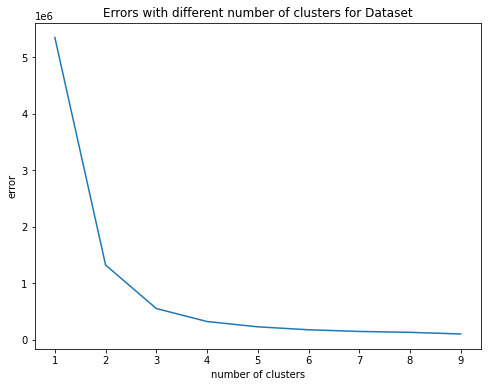

In [32]:
plt.figure(figsize = (8,6))
plt.plot(np.arange(1, 10), errors)
plt.title('Errors with different number of clusters for Dataset')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [33]:
print(errors)

[5349251.173192, 1322018.370411783, 552013.7781680705, 322045.7441320725, 228161.06340106565, 175950.1655450468, 146237.9299553237, 130563.51580720895, 101614.2262083058]


### We can see that k=3 is a good choice for number of clusters because error redauction rate is very low after that.

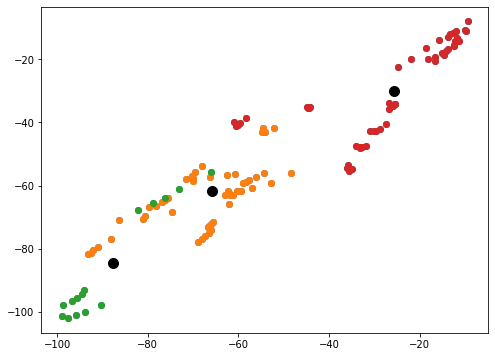

In [24]:
centroids, u, error = fuzzy_cmeans_model(dataset=dataQCM, k=3, num_iterations=100, m=2)
plot_results(dataQCM, u, centroids, k=3)

### Trying different values for m

In [34]:
errors = []

for i in range(2,12):
  centroids, u, error = fuzzy_cmeans_model(dataset=dataQCM, k=3, num_iterations=100, m=i)
  errors.append(error)

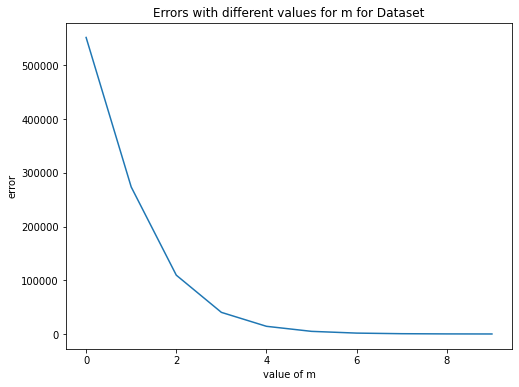

In [35]:
plt.figure(figsize = (8,6))
plt.plot(errors)
plt.title('Errors with different values for m for Dataset')
plt.xlabel('value of m')
plt.ylabel('error')
plt.show()

In [36]:
print(errors)

[552013.7781680705, 273675.31972060935, 109522.60841735757, 40286.058213249526, 14326.817848193461, 4933.596429214704, 1683.2837036939657, 570.9975853004663, 192.94227544508362, 65.01872774728781]


### When we convert the fuzzy data into crisp data then there is no obvious change when we plot the data points.

### Fuzzy Plotting

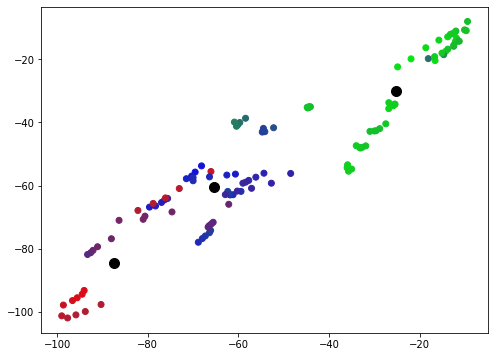

In [44]:
centroids, u, error = fuzzy_cmeans_model(dataset=dataQCM, k=3, num_iterations=100, m=3)
fuzzy_plot(dataQCM, u, centroids, k=3)

### Gradient Color Means Two Subset in One Cluster